Keiland Pullen

DSC 478 - Assignment 2 - part 2

In [69]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



a.) 

Load the data, separate label, create dummy variables

In [44]:
df = pd.read_csv("/Users/Home/Desktop/DePaul/Winter - DSC - 478 - Programming Machine Learning/Week 4/Homework/adult-modified1.csv")
df.shape
# df.head

adult_labels = df['income']

df = df.drop('income',1)

adult_data = pd.get_dummies(data=df, columns = ['workclass', 'marital-status', 'race','sex'])
adult_data

# df
# adult_labels

C:\Users\Home\AppData\Local\Temp/ipykernel_16432/77693857.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('income',1)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,38,10,60,1,0,0,1,0,0,0,0,0,1,0,1
9408,25,9,8,1,0,0,0,1,0,0,0,0,1,1,0
9409,21,10,40,1,0,0,0,1,0,0,1,0,0,0,1
9410,38,2,53,1,0,0,1,0,0,0,0,0,1,0,1


b.)

1.) Normalize the data, run KNN classifier, generate confusion matrix and classification report.

In [53]:
from sklearn.model_selection import train_test_split

adult_train, adult_test, adult_target_train, adult_target_test = train_test_split(adult_data, adult_labels, test_size=0.2, random_state=33)


In [56]:
adult_target_train

272     <=50K
7383    <=50K
5508    <=50K
4471    <=50K
6138    <=50K
        ...  
57      <=50K
578      >50K
5848    <=50K
2439    <=50K
7188    <=50K
Name: income, Length: 7529, dtype: object

In [80]:
from sklearn import preprocessing

minmax_scaler = preprocessing.MinMaxScaler().fit(adult_train)
adult_train_minmax = minmax_scaler.transform(adult_train)
adult_test_minmax = minmax_scaler.transform(adult_test)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(adult_train_minmax, adult_target_train)

pred_train = neigh.predict(adult_train_minmax)

pred_test = neigh.predict(adult_test_minmax)

pred_train

pred_test

array(['>50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [82]:
#pred-train accuracy

(adult_target_train == pred_train).mean()

0.8358347722141054

In [83]:
#pred-test accuracy

(adult_target_test != pred_test).mean()

0.19330855018587362

In [84]:
print(confusion_matrix(adult_target_test, pred_test))
print(classification_report(adult_target_test, pred_test))

[[1310  133]
 [ 231  209]]
              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      1443
        >50K       0.61      0.47      0.53       440

    accuracy                           0.81      1883
   macro avg       0.73      0.69      0.71      1883
weighted avg       0.79      0.81      0.80      1883



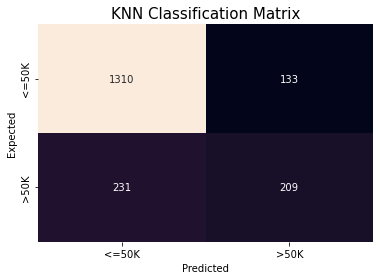

In [85]:
knn_confusion_matrix = pd.crosstab(index = adult_target_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(knn_confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("KNN Classification Matrix", fontsize = 15)
plt.show()

b.)

2.) Next, experiment with different values of K....


In [75]:
neigh2 = KNeighborsClassifier(n_neighbors=25, weights='distance')
neigh2.fit(adult_train, adult_target_train)

pred_train_2 = neigh2.predict(adult_train)

pred_test_2 = neigh2.predict(adult_test)

#pred_train_2
#pred_test_2


neigh3 = KNeighborsClassifier(n_neighbors=25, weights='uniform')
neigh3.fit(adult_train, adult_target_train)

pred_train_3 = neigh3.predict(adult_train)

pred_test_3 = neigh3.predict(adult_test)

#pred_train_3
#pred_test_3


k     =  [adult_target_train[i][0] for i in range (len(adult_target_train))]
dist  =  [pred_train_2[i] for i in range (len(adult_target_train))]
unif  =  [pred_train_3[i] for i in range (len(adult_target_train))]
    
plt.plot(k, euclid, label = "Distance Weight")
plt.plot(k, cosin, label = "Uniform Weight" )
plt.xlabel("K")
plt.ylabel("Distance")
plt.legend(loc="best")
plt.title("Weight Comparison")
plt.show()

KeyError: 5

b.)

3.) Next, using only "Uniform" weights, compare the accuracy of the KNN classifier using .. 


c.) Using the non-normalized training and test data, perform classification using scikit-learns decision tree classifier...


In [98]:
from sklearn import neighbors, tree, naive_bayes

tree_class = tree.DecisionTreeClassifier()
tree_class = tree_class.fit(adult_train, adult_target_train)
tree_preds_test = tree_class.predict(adult_test)

print(classification_report(adult_target_test, tree_preds_test))
print(confusion_matrix(adult_target_test, tree_preds_test))

tree_accuracy = tree_class.score(adult_test, adult_target_test)
tree_accuracy

              precision    recall  f1-score   support

       <=50K       0.84      0.87      0.85      1443
        >50K       0.51      0.44      0.47       440

    accuracy                           0.77      1883
   macro avg       0.67      0.66      0.66      1883
weighted avg       0.76      0.77      0.76      1883

[[1255  188]
 [ 245  195]]


0.7700477960701009

In [99]:
from sklearn import neighbors, tree, naive_bayes

tree_class = tree.DecisionTreeClassifier(min_samples_split=10, max_depth=4)
tree_class = tree_class.fit(adult_train, adult_target_train)

tree_preds_test = tree_class.predict(adult_test)

print(classification_report(adult_target_test, tree_preds_test))
print(confusion_matrix(adult_target_test, tree_preds_test))

tree_accuracy = tree_class.score(adult_test, adult_target_test)
tree_accuracy

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      1443
        >50K       0.68      0.41      0.51       440

    accuracy                           0.82      1883
   macro avg       0.76      0.68      0.70      1883
weighted avg       0.80      0.82      0.80      1883

[[1358   85]
 [ 260  180]]


0.8167817312798725

In [105]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(tree_class, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

ModuleNotFoundError: No module named 'graphviz'

d.) Use scikit-learn to build classifiers using Naive Bayes (Gaussian) and LDA.... 


In [123]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

adult_train, adult_test, adult_target_train, adult_target_test = train_test_split(adult_data, adult_labels, test_size=0.2, random_state=33)

gnb = GaussianNB()
model_1 = gnb.fit(adult_train, adult_target_train)
model_pred = gnb.fit(adult_train, adult_target_train).predict(adult_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (adult_test.shape[0], (adult_target_test != model_pred).sum()))

cv_results1 = cross_validate(model_1, adult_train, adult_target_train, cv=10)
print(cv_results1)

Number of mislabeled points out of a total 1883 points : 529
{'fit_time': array([0.00894523, 0.00797868, 0.00798273, 0.00994039, 0.01495934,
       0.00797606, 0.00797868, 0.00927567, 0.00797844, 0.00797892]), 'score_time': array([0.00199413, 0.00199485, 0.00199461, 0.0039916 , 0.00399089,
       0.00199485, 0.00199461, 0.00199533, 0.00199413, 0.00199437]), 'test_score': array([0.71447543, 0.72642762, 0.71580345, 0.70783533, 0.72244356,
       0.70916335, 0.73439575, 0.72377158, 0.71447543, 0.72340426])}


In [122]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate

adult_train, adult_test, adult_target_train, adult_target_test = train_test_split(adult_data, adult_labels, test_size=0.2, random_state=33)

lda_class = LinearDiscriminantAnalysis()
model_2 = lda_class.fit(adult_train, adult_target_train)

print(lda_class.predict(adult_test))

cv_results2 = cross_validate(model_2, adult_train, adult_target_train, cv=10)
print(cv_results2)

['>50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '>50K']
{'fit_time': array([0.0229423 , 0.02991796, 0.02194381, 0.02094483, 0.02793002,
       0.01994705, 0.0219419 , 0.02094388, 0.02493286, 0.03191495]), 'score_time': array([0.00299001, 0.00299191, 0.0029912 , 0.00299096, 0.0019908 ,
       0.00299191, 0.00199389, 0.00299215, 0.00299168, 0.00199413]), 'test_score': array([0.79681275, 0.82071713, 0.78486056, 0.79415671, 0.79814077,
       0.80478088, 0.81142098, 0.8313413 , 0.81540505, 0.80851064])}
